In [1]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
weather = pd.read_csv("weather3_180703.csv")
weather['date'] = pd.to_datetime(weather["date"])

station = weather[weather['station_nbr'] == 5].reset_index(drop=True)

station.loc[(station["date"].dt.year == 2014) & (station["date"].dt.month == 1), "sunrise"] = station.loc[(station["date"].dt.year == 2013)\
                                                                                            & (station["date"].dt.month == 1), "sunrise"].values
station.loc[(station["date"].dt.year == 2014) & (station["date"].dt.month == 1), "sunset"] = station.loc[(station["date"].dt.year == 2013)\
                                                                                            & (station["date"].dt.month == 1), "sunset"].values

In [3]:
# sunset, sunrise 단위를 분으로 고치기
station["sunrise"] = ((station["sunrise"].astype("int64")// 100 * 60) + (station['sunrise'].astype("int64") % 100))
station["sunset"] = ((station['sunset'].astype("int64") // 100 * 60) + (station['sunset'].astype("int64") % 100))

# daytime 계산
station["daytime"] = station["sunset"] - station["sunrise"]

In [4]:
station.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing
0,5,2012-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251,1153,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,6,1,NaN,NaN,902,4,0,0,0,0,1
1,5,2012-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251,1154,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,6,2,NaN,NaN,903,5,1,0,0,0,1
2,5,2012-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250,1155,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,6,3,NaN,NaN,905,6,1,0,0,0,1
3,5,2012-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250,1155,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,6,4,NaN,NaN,905,0,0,0,0,0,1
4,5,2012-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249,1156,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,6,5,NaN,NaN,907,1,0,0,0,0,1


In [5]:
len(station)

852

In [6]:
for i in station.columns:
    count_null = station[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(station) * 100),2),"%",")")

station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 822 ( 96.48 % )
tmin : 822 ( 96.48 % )
tavg : 822 ( 96.48 % )
depart : 822 ( 96.48 % )
dewpoint : 446 ( 52.35 % )
wetbulb : 852 ( 100.0 % )
heat : 822 ( 96.48 % )
cool : 822 ( 96.48 % )
sunrise : 0 ( 0.0 % )
sunset : 0 ( 0.0 % )
codesum : 0 ( 0.0 % )
snowfall : 822 ( 96.48 % )
preciptotal : 822 ( 96.48 % )
stnpressure : 852 ( 100.0 % )
sealevel : 447 ( 52.46 % )
resultspeed : 446 ( 52.35 % )
resultdir : 446 ( 52.35 % )
avgspeed : 822 ( 96.48 % )
year : 0 ( 0.0 % )
month : 0 ( 0.0 % )
day : 0 ( 0.0 % )
relative_humility : 826 ( 96.95 % )
windchill : 822 ( 96.48 % )
daytime : 0 ( 0.0 % )
week7 : 0 ( 0.0 % )
weekend : 0 ( 0.0 % )
code_change : 0 ( 0.0 % )
rainY : 0 ( 0.0 % )
otherY : 0 ( 0.0 % )
nothing : 0 ( 0.0 % )


In [7]:
train = pd.read_csv("train.csv")
train.date = pd.to_datetime(train.date)
train.tail()

,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [8]:
key = pd.read_csv("key.csv")
station = station.merge(key)

In [9]:
station = station.merge(train)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
94456,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,107,0
94457,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,108,0
94458,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,109,0
94459,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,110,0
94460,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,111,0


In [10]:
station['log1p_units'] = np.log1p(station.units)

In [11]:
# # units가 다 0인 item_number 골라내기
# stn_real = pd.DataFrame(columns = station.columns)
# station["item_nbr"] = station["item_nbr"].astype("str")
# item_number = station.groupby("item_nbr")["units"].agg(sum)
# stn_item = item_number[item_number != 0].index
# stn_real = pd.DataFrame(columns = station.columns)
# for i in range(len(stn_item)):
#     stn_real = pd.concat([stn_real, station[station["item_nbr"] == stn_item[i]]], ignore_index=True)

## 전체 데이터로 OLS

In [12]:
target1 = station['units']
target2 = station['log1p_units']

station.drop(columns=['units','log1p_units'],inplace=True)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr
94456,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,107
94457,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,108
94458,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,109
94459,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,110
94460,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,111


In [13]:
len(station)

94461

In [25]:
df1 = pd.concat([station,target1], axis=1)
df2 = pd.concat([station,target2], axis=1)

In [15]:
df2.to_csv("station5.csv", sep=",", index=False)

### 1. OLS : df1 (units) 
- data에 missing이 많아 가지고 있는 변수만 사용

In [18]:
model1 = sm.OLS.from_formula('units ~ sunset + sunrise + daytime + C(year) + C(month) + C(weekend) + C(item_nbr)+ 0', data = df1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     110.0
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        03:30:24   Log-Likelihood:                -5117.4
No. Observations:                2886   AIC:                         1.050e+04
Df Residuals:                    2752   BIC:                         1.130e+04
Df Model:                         133                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(resultdir)[1.0]      4.4990      8

### 2. OLS : df1 (units) - 스케일링 
- conditional number가 너무 높음.

In [26]:
model1_1 = sm.OLS.from_formula('units ~ scale(sunset) + scale(sunrise) + scale(daytime) + C(year) + C(month) + C(weekend) + C(item_nbr)+ 0', data = df1)
result1_1 = model1_1.fit()
print(result1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     2148.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        03:36:57   Log-Likelihood:            -1.7443e+05
No. Observations:               94461   AIC:                         3.491e+05
Df Residuals:                   94334   BIC:                         3.503e+05
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(year)[2012]         -0.0505      0

스케일링을 했으나 conditional number가 크게 떨어지진 않았다.

### 3. OLS :  df1 (units) - 아웃라이어 제거 

In [27]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df1) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

97

In [28]:
idx = list(set(range(len(df1))).difference(idx_outlier))
df1_1 = df1.iloc[idx, :].reset_index(drop=True)
df1_1.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
94359,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,107,0
94360,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,108,0
94361,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,109,0
94362,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,110,0
94363,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,111,0


In [29]:
# OLS - df1_1
model1_1_1 = sm.OLS.from_formula('units ~ scale(sunset) + scale(sunrise) + scale(daytime)\
                            + C(year) + C(month) + C(weekend) \
                            + C(item_nbr) + 0', data = df1_1)
result1_1_1 = model1_1_1.fit()
print(result1_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     2121.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        03:38:38   Log-Likelihood:            -1.7364e+05
No. Observations:               94364   AIC:                         3.475e+05
Df Residuals:                   94237   BIC:                         3.487e+05
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(year)[2012]         -0.0448      0

### 4. 변수변환 : df2 (log1p_units) 

In [30]:
model2 = sm.OLS.from_formula('log1p_units ~ scale(sunset) + scale(sunrise) + scale(daytime) + C(year) + C(month) + C(weekend) \
                            + C(item_nbr) + 0', data = df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     4132.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        03:40:21   Log-Likelihood:                 34789.
No. Observations:               94461   AIC:                        -6.932e+04
Df Residuals:                   94334   BIC:                        -6.812e+04
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(year)[2012]          0.0099      0

### 5. 변수변환 : df2 (log1p_units) + 아웃라이어 제거

In [31]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result2.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df2) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

2638

In [32]:
idx = list(set(range(len(df2))).difference(idx_outlier))
df2_1 = df2.iloc[idx, :].reset_index(drop=True)
df2_1.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,log1p_units
91818,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,107,0.0
91819,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,108,0.0
91820,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,109,0.0
91821,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,110,0.0
91822,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,376,1000,MD,NaN,NaN,NaN,30.01,10.8,5.0,NaN,2014,10,31,NaN,NaN,624,4,0,0,0,0,1,35,111,0.0


In [33]:
# OLS - df2_1
model2_1 = sm.OLS.from_formula('log1p_units ~ scale(sunset) + scale(sunrise) + scale(daytime) + C(year) + C(month) + C(weekend) \
                            + C(item_nbr) + 0', data = df2_1)
result2_1 = model2_1.fit()
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.841e+05
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        03:41:51   Log-Likelihood:             2.3311e+05
No. Observations:               91823   AIC:                        -4.660e+05
Df Residuals:                   91696   BIC:                        -4.648e+05
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(year)[2012]          0.0004      0

### 6. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환 

In [120]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + scale(sunset) + scale(sunrise) + scale(daytime) \
                            + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.951e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        00:44:08   Log-Likelihood:             1.4191e+05
No. Observations:               91800   AIC:                        -2.835e+05
Df Residuals:                   91624   BIC:                        -2.818e+05
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

R^2값이 1에 가까워지고 조건수는 변화없어 과최적화가 의심

### 6 - 1. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + sunrise/sunset/daytime제거(VIF에 근거) + p-value 판단하여 제거

In [42]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.107e+05
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        03:49:03   Log-Likelihood:             2.3306e+05
No. Observations:               91823   AIC:                        -4.659e+05
Df Residuals:                   91712   BIC:                        -4.649e+05
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(item_nbr)[1]             0      0.00

### 7. result2의 잔차의 정규성 검정 : 정규성을 띄지 않음.

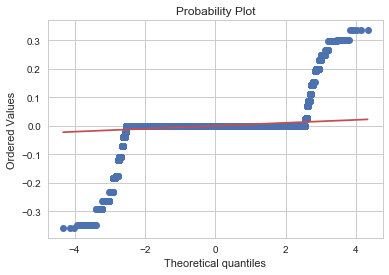

In [43]:
%matplotlib inline
sp.stats.probplot(result2_1_1.resid, plot=plt)
plt.show()

### 8.  다중공선성 감소시키기 : VIF

In [34]:
df2_1.columns

Index(['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 'year', 'month', 'day', 'relative_humility', 'windchill', 'daytime', 'week7', 'weekend', 'code_change', 'rainY', 'otherY', 'nothing', 'store_nbr', 'item_nbr', 'log1p_units'], dtype='object')

In [16]:
# sampleX = df2_1.loc[:, cols]
# sampley = df2_1.loc[:,"log1p_units"]
# sns.pairplot(sampleX)
# plt.show()

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

cols = ['sunrise', 'sunset', 'daytime', 'item_nbr']

y = df2_1.loc[:,cols]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif["features"] = y.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)

vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,inf,sunrise
1,inf,sunset
2,inf,daytime
3,4.056607,item_nbr


sunrise, sunset을 빼고 df2_1을 다시 OLS돌려본다(6-1번 참조)

### 9. Cross validation(교차검증)
- conditional number 가 10이하이므로 정규화 하지 않음

In [44]:
from patsy import dmatrix

In [45]:
# 독립변수와 종속변수로 나누기
df2_1_target = df2_1['log1p_units']
df2_1_X = df2_1.drop(columns=['log1p_units'])

In [46]:
len(df2_1_X), len(df2_1_target)

(91823, 91823)

##### scikit learn에서 적용할 때 사용하는 코드 :df2_1(log1p_units) 대상

In [47]:
formula = 'C(item_nbr) + 0'
dfX = dmatrix(formula, df2_1_X, return_type='dataframe')
dfy = pd.DataFrame(df2_1_target, columns=["log1p_units"])

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

model = LinearRegression()
cv = KFold(10, shuffle=True, random_state=0)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

scores

array([0.99590225, 0.99596672, 0.99643119, 0.99608674, 0.99568353,
       0.99661054, 0.99669393, 0.99565478, 0.99580559, 0.99582912])

In [52]:
# Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores1 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    y_pred = model.predict(X_test)
    scores1[i] = r2_score(y_test, y_pred)

scores1

ValueError: shapes (73458,111) and (18365,111) not aligned: 111 (dim 1) != 18365 (dim 0)

### station 평균성능

In [54]:
scores.mean()

0.9960664395782934